# Pathway enrichment in MAFA mutant T2
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData
from scipy.stats import pearsonr, spearmanr


## Load Data

In [2]:
# Read raw data and process it
adata = pd.read_csv('../data/S64F_gene_count.txt', index_col=18, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAS64F_001,611586,314216,328546,267945,135623,122556,169291,198632,113766,95446,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_002,575049,409669,243106,184948,187221,88068,124960,108400,116860,134805,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_003,824730,218574,321668,278746,92467,111493,152005,118341,80843,71644,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_004,858370,262758,351032,358769,109622,134079,175299,232638,115243,58507,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_005,828227,500390,312265,281623,228104,110909,158423,149446,154143,164299,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_006,882622,241947,252381,210988,113488,104409,103355,75316,88540,91730,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_007,698088,281983,336437,280200,118392,117157,164344,222087,105979,86190,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_008,695656,403657,227741,176757,183399,79146,98225,93109,120291,131636,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_009,656783,205008,214125,229070,97473,115874,111309,52115,74326,77237,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_010,992861,158438,381157,341457,70606,135710,161331,154493,49674,52146,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData_Mut.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAS64F_001,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_002,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_003,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_004,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_005,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_006,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_007,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_008,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_009,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAS64F_001,Control,T0,N
MAFAS64F_002,Control,T0,N
MAFAS64F_003,Control,T0,N
MAFAS64F_004,Control,T2,Y
MAFAS64F_005,Control,T2,Y
MAFAS64F_006,Control,T2,Y
MAFAS64F_007,Control,T1,Y
MAFAS64F_008,Control,T1,Y
MAFAS64F_009,Control,T1,Y
MAFAS64F_010,MAFA,T0,N


In [6]:
# split data set by timepoint
# subset_t0 = adata[adata.obs.time_point == 'T0']
#subset_t1 = adata[adata.obs.time_point == 'T1']
subset_t2 = adata[adata.obs.time_point == 'T2']
# print("Subset for time point T0:")
# print(subset_t0)
# subset_t0.obs
# print("\nSubset for time point T1:")
# print(subset_t1)
print("\nSubset for time point T2:")
print(subset_t2)


Subset for time point T2:
View of AnnData object with n_obs × n_vars = 6 × 58735
    obs: 'condition', 'time_point', 'DOX'


## Quality Control

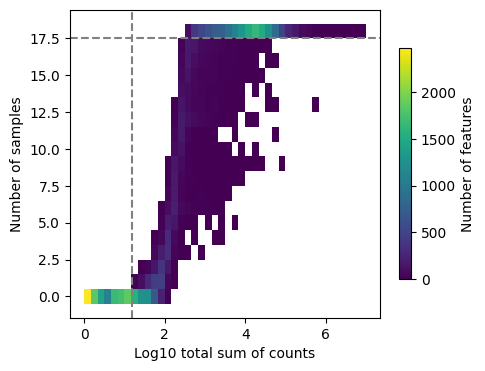

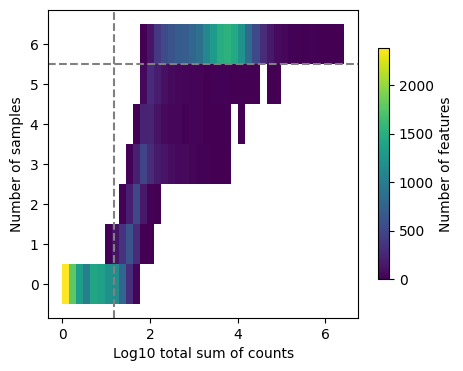

In [7]:
#check various filter points
#old
dc.plot_filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
dc.plot_filter_by_expr(subset_t2, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1,save='../figures/Mut/t2_QC.png')


In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(subset_t2, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

14725

In [9]:
# Filter by these genes
adata = subset_t2[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 6 × 14725
    obs: 'condition', 'time_point', 'DOX'

In [10]:
#!pip install pydeseq2

In [11]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [12]:
adata.X = np.round(adata.X,0)

In [13]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

In [14]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.90 seconds.

Fitting dispersion trend curve...
... done in 4.23 seconds.

Fitting MAP dispersions...
... done in 22.01 seconds.

Fitting LFCs...
... done in 1.77 seconds.

Refitting 0 outliers.



In [15]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=["condition", 'MAFA', 'Control'], n_cpus=8)

In [16]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 0.96 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,428451.375000,-4.449943,0.148553,-29.955333,3.749637e-197,4.928429e-195
MT-CO1,293957.656250,-0.187095,0.242216,-0.772430,4.398596e-01,5.132102e-01
GCG,147582.484375,-6.358098,0.470763,-13.505941,1.442588e-41,1.775613e-40
INS,138888.531250,-5.476243,0.472962,-11.578621,5.289000e-31,4.797250e-30
MT-ND4,145156.531250,0.096140,0.344485,0.279084,7.801802e-01,8.231229e-01
...,...,...,...,...,...,...
PPP1R14D,13.476041,0.639776,0.327653,1.952604,5.086655e-02,7.601325e-02
RAPGEF3,17.646389,-0.635212,0.291426,-2.179665,2.928228e-02,4.601948e-02
AC010186.3,17.019512,0.732805,0.500790,1.463299,1.433856e-01,1.925718e-01


In [17]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_MAFA_vs_Control')

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 3.82 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,428451.375000,-5.114690,0.151485,-29.955333,3.749637e-197,4.928429e-195
MT-CO1,293957.656250,2.488517,0.305802,-0.772430,4.398596e-01,5.132102e-01
GCG,147582.484375,-0.986172,1.162136,-13.505941,1.442588e-41,1.775613e-40
INS,138888.531250,-0.855896,0.920575,-11.578621,5.289000e-31,4.797250e-30
MT-ND4,145156.531250,1.387626,0.419532,0.279084,7.801802e-01,8.231229e-01
...,...,...,...,...,...,...
PPP1R14D,13.476041,-0.144270,0.846144,1.952604,5.086655e-02,7.601325e-02
RAPGEF3,17.646389,-0.573330,0.285146,-2.179665,2.928228e-02,4.601948e-02
AC010186.3,17.019512,0.586030,0.483140,1.463299,1.433856e-01,1.925718e-01


In [18]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,428451.375000,-5.114690,0.151485,-29.955333,3.749637e-197,4.928429e-195
MT-CO1,293957.656250,2.488517,0.305802,-0.772430,4.398596e-01,5.132102e-01
GCG,147582.484375,-0.986172,1.162136,-13.505941,1.442588e-41,1.775613e-40
INS,138888.531250,-0.855896,0.920575,-11.578621,5.289000e-31,4.797250e-30
MT-ND4,145156.531250,1.387626,0.419532,0.279084,7.801802e-01,8.231229e-01
...,...,...,...,...,...,...
PPP1R14D,13.476041,-0.144270,0.846144,1.952604,5.086655e-02,7.601325e-02
RAPGEF3,17.646389,-0.573330,0.285146,-2.179665,2.928228e-02,4.601948e-02
AC010186.3,17.019512,0.586030,0.483140,1.463299,1.433856e-01,1.925718e-01


In [19]:
#!pip install adjustText

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


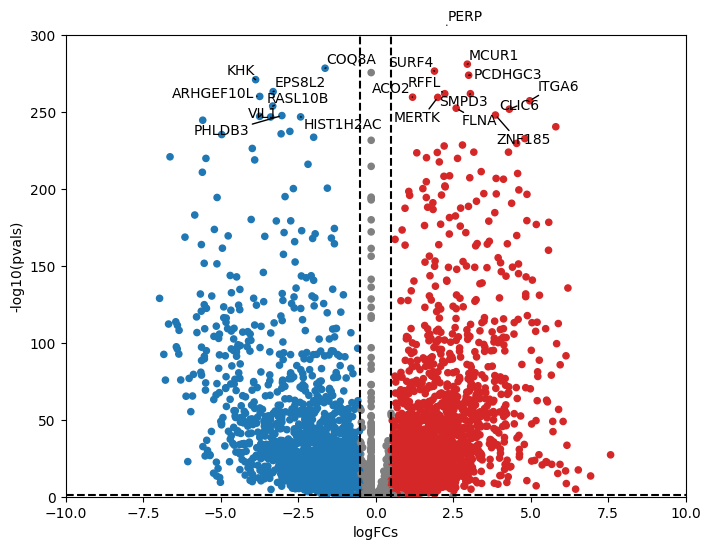

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    ax=ax
)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 300)
plt.savefig('../figures/Mut/t2_volcano.png')

In [21]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,LRRC37A5P,AP006222.1,AL021707.6,AC009065.2,FTH1P8,PPP1R14D,RAPGEF3,AC010186.3,AC068987.1,LINC00605
treatment.vs.control,-29.955333,-0.77243,-13.505941,-11.578621,0.279084,-1.029781,-19.608056,-7.214461,-1.676334,-0.18016,...,-0.921671,1.564298,2.5574,0.664727,1.343881,1.952604,-2.179665,1.463299,0.149464,-0.164965


### Transcription factor activity inference

In [22]:
#collectri = dc.get_collectri(organism='human')
collectri=pd.read_csv("collectri.csv")
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


### Activity inference with Univariate Linear Model (ULM)

In [23]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

Running ulm on mat with 1 samples and 14725 targets for 626 sources.


,ABL1,AHR,AHRR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,-0.942698,-3.565536,-0.210231,-0.706286,-0.736796,0.617901,0.443591,0.301258,-2.43448,-0.151952,...,-1.235505,-0.844033,0.514654,-0.163733,-1.487391,2.280517,-0.322999,-0.228174,0.724782,-1.192151


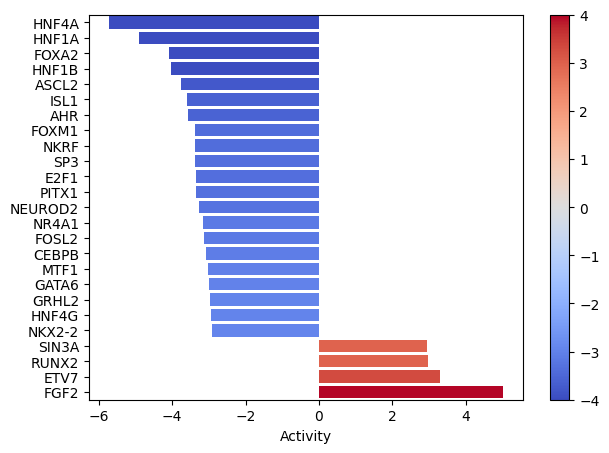

In [24]:
dc.plot_barplot(
    tf_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save='../figures/Mut/t2_tf_activities.png'
)

# TF Activity with MLM

In [25]:
tf_acts_MLM, tf_pvals_MLM, = dc.run_mlm(mat=mat, net=collectri, verbose=True)
tf_acts_MLM

Running mlm on mat with 1 samples and 14725 targets for 626 sources.


,ABL1,AHR,AHRR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,-0.2298,-2.271465,-0.109382,0.114819,0.635863,1.62851,2.068784,0.432455,-0.502378,0.187257,...,-1.849932,0.043405,1.279719,0.175035,-1.66551,2.159412,1.056344,-0.2147,0.036367,-1.004662


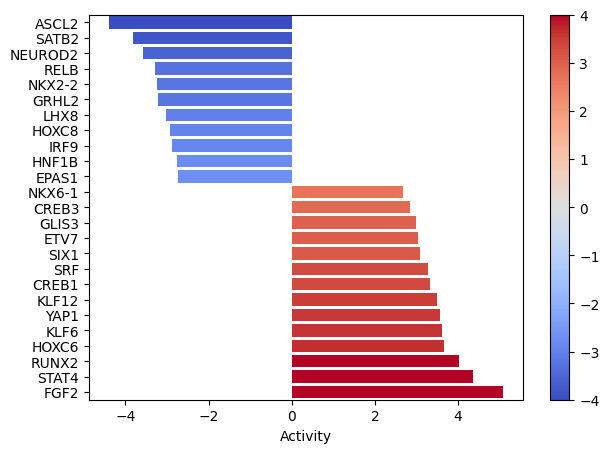

In [26]:
dc.plot_barplot(
    tf_acts_MLM,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save='../figures/MUT/t2_tf_activities_MLM.png'
)

# Compare ULM and MLM results correlations

In [27]:
pearson_r, pearson_p = pearsonr(tf_acts.values.flatten(), tf_acts_MLM.values.flatten())
spearman_r, spearman_p = spearmanr(tf_acts.values.flatten(), tf_acts_MLM.values.flatten())

print(f"Pearson correlation: {pearson_r:.2f} (p-value: {pearson_p:.2e})")
print(f"Spearman correlation: {spearman_r:.2f} (p-value: {spearman_p:.2e})")

Pearson correlation: 0.69 (p-value: 7.98e-89)
Spearman correlation: 0.66 (p-value: 2.68e-78)


# Find overlap in (Top 25)

In [28]:
ulm_top_25 = tf_acts.T.sort_values(by='treatment.vs.control', ascending=False).head(25).index
mlm_top_25 = tf_acts_MLM.T.sort_values(by='treatment.vs.control', ascending=False).head(25).index
len(set(ulm_top_25)&set(mlm_top_25)) / float(len(set(ulm_top_25) | set(mlm_top_25))) * 100

25.0

# Find overlap in top 10% (Top 65)

In [29]:
ulm_top = tf_acts.T.sort_values(by='treatment.vs.control', ascending=False).head(int(len(tf_acts.T) * 0.1)).index
mlm_top = tf_acts_MLM.T.sort_values(by='treatment.vs.control', ascending=False).head(int(len(tf_acts_MLM.T) * 0.1)).index
#len(set(ulm_top)&set(mlm_top)) #length of overlap of both
#float(len(set(ulm_top))) #lengh of first list
# set(mlm_top))) * 100 scale to %
len(set(ulm_top)&set(mlm_top)) / float(len(set(ulm_top) | set(mlm_top))) * 100

29.166666666666668

# Save activity scores

In [30]:
tf_acts.index =["ulm"]
tf_acts_MLM.index =["mlm"]
all_activity_scores = pd.concat([tf_acts, tf_acts_MLM])
all_activity_scores
all_activity_scores.to_csv("MUT_2_tf_activity_scores.csv",index=False)

In [25]:
# #activated
# dc.plot_targets(results_df, stat='stat', source_name='FGF2', net=collectri, top=15,save='../figures/Mut/t2_FGF2_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='ETV7', net=collectri, top=15,save='../figures/Mut/t2_ETV7_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='POU5F1', net=collectri, top=15,save='../figures/Mut/t2_POU5F1_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='GLIS3', net=collectri, top=15,save='../figures/Mut/t2_GLIS3_targets.png')

# #inhibited
# dc.plot_targets(results_df, stat='stat', source_name='HNF4A', net=collectri, top=15,save='../figures/Mut/t2_HNF4A_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='HNF1A', net=collectri, top=15,save='../figures/Mut/t2_HNF1A_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='FOXA2', net=collectri, top=15,save='../figures/Mut/t2_FOXA2_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='HNF1B', net=collectri, top=15,save='../figures/Mut/t2_HNF1B_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='AHR', net=collectri, top=15,save='../figures/Mut/t2_AHR_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='FOXM1', net=collectri, top=15,save='../figures/Mut/t2_FOXM1_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='HNF4G', net=collectri, top=15,save='../figures/Mut/t2_HNF4G_targets.png')
# #MAFA
# dc.plot_targets(results_df, stat='stat', source_name='MAFA', net=collectri, top=15,save='../figures/Mut/t2_MAFA_targets.png')

## Plot Network

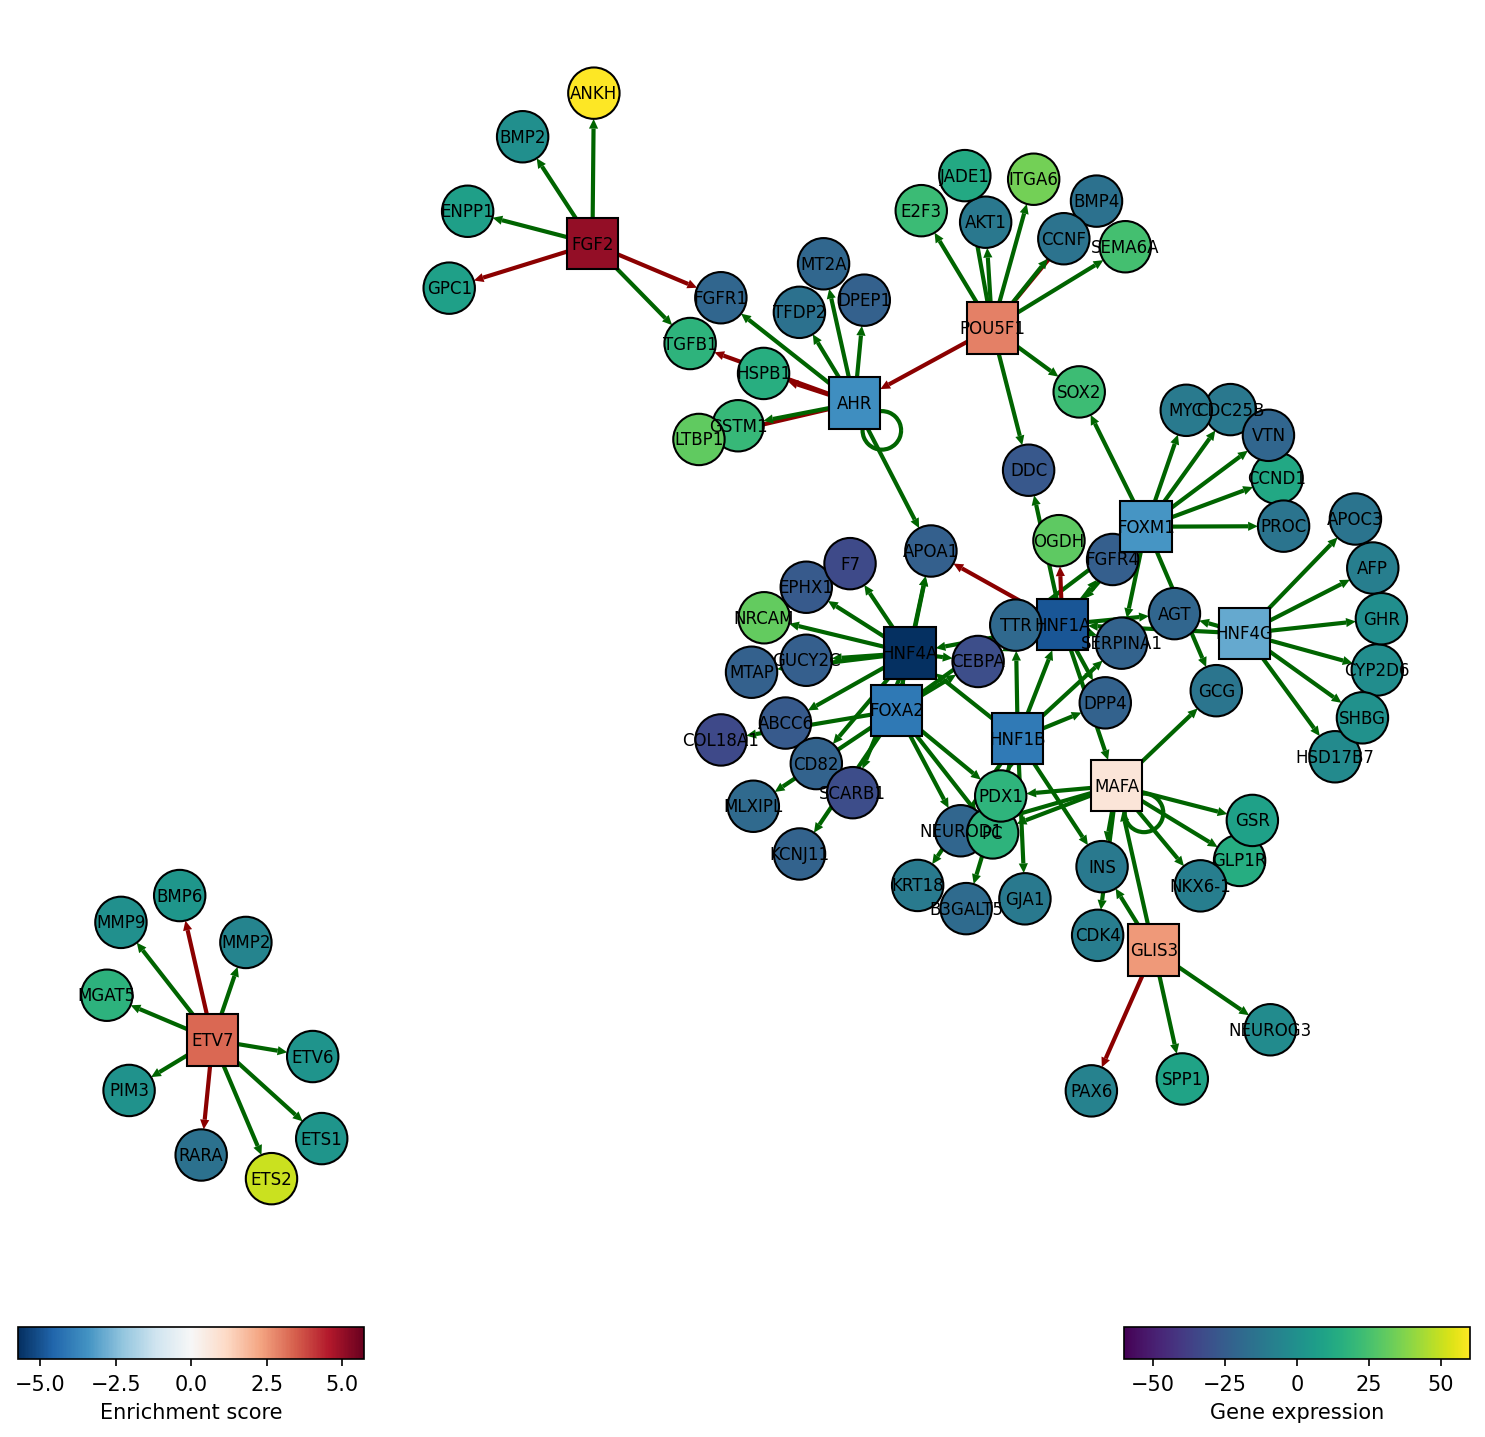

In [26]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=['FGF2', 'ETV7', 'POU5F1', 'GLIS3', 'HNF4A', 'HNF1A', 'FOXA2', 'HNF1B', 'AHR', 'FOXM1', 'HNF4G', 'MAFA'],
    n_targets=10,
    node_size=0.5,
    label_size=8,
    figsize=(10, 10),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save = '../figures/Mut/t2_plot_networks.png'
)

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


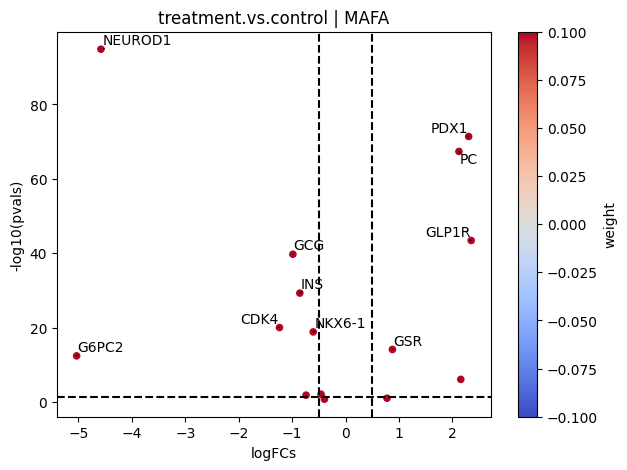

In [27]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway activity inference

In [28]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


### Activity inference with multivariate Linear Model (MLM)

In [29]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 14725 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
treatment.vs.control,0.903704,-0.551928,1.094199,2.898926,-8.134493,-0.871942,0.449321,-0.202942,0.992798,-0.283637,-0.946558,-1.251788,-3.125572,0.372131


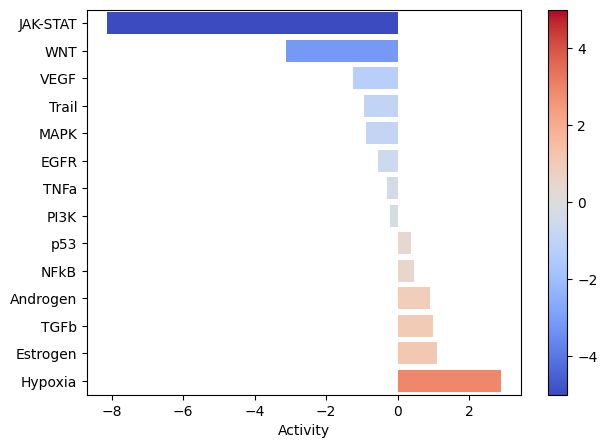

In [30]:
dc.plot_barplot(
    pathway_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=-5,
    vmax=5,
    save='../figures/Mut/t2_pathway_activities.png'
)

In [31]:
# # increase activity
# dc.plot_targets(results_df, stat='stat', source_name='Hypoxia', net=progeny, top=30,save='../figures/Mut/t2_Hypoxia_targets.png')
# # decrease activity
# dc.plot_targets(results_df, stat='stat', source_name='JAK-STAT', net=progeny, top=30,save='../figures/Mut/t2_JAK-STAT_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='WNT', net=progeny, top=30, save='../figures/Mut/t2_WNT_targets.png')

# # Approach to investigate p53 -> PPI -> mechanism? -> ask -> Table with list of targets for each one of the pathways with statistics 

### Funtional enrichment of Biological Terms

In [32]:
# # The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to different biological processes.
# msigdb = dc.get_resource('MSigDB')
# msigdb

In [33]:
# msigdb['collection'].unique()

In [34]:
# # Filter by hallmark
# msigdb = msigdb[msigdb['collection']=='hallmark']

# # Remove duplicated entries
# msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# # Rename
# msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

# msigdb

## ORA

In [35]:
# # Infer enrichment with ora using significant deg
# top_genes = results_df[results_df['padj'] < 0.05]

# # Run ora
# enr_pvals = dc.get_ora_df(
#     df=top_genes,
#     net=msigdb,
#     source='geneset',
#     target='genesymbol'
# )

# enr_pvals.head()

In [36]:
# dc.plot_dotplot(
#     enr_pvals.sort_values('Combined score', ascending=False).head(15),
#     x='Combined score',
#     y='Term',
#     s='Odds ratio',
#     c='FDR p-value',
#     scale=0.4,
#     figsize=(5, 10),
#     save='../figures/Mut/t2_ORA.png'
# )